In [2]:
import numpy as np 
import pandas as pd 


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/house-price/Housing (1).csv


In [5]:
# read the data as a dataframe
df = pd.read_csv('/kaggle/input/house-price/Housing (1).csv')

In [6]:
# Step 2: View the shape and first few rows
print(f"Dataset dimensions: {df.shape[0]} rows and {df.shape[1]} columns\n")
print("First 5 rows of the dataset:")
display(df.head())

Dataset dimensions: 545 rows and 13 columns

First 5 rows of the dataset:


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [7]:
# Step 3: Check data types and basic info
print("\nData types and non-null counts:")
df.info()


Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [8]:
# Step 4: Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [9]:
# Step 5: Check for duplicate records
duplicate_count = df.duplicated().sum()
print(f"\nNumber of duplicate records: {duplicate_count}")


Number of duplicate records: 0


In [10]:
# Step 6: Statistical summary of numerical features
print("Statistical summary of numerical features:")
display(df.describe())

Statistical summary of numerical features:


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [11]:
# Step 7: Frequency distribution of categorical variables
print("\nFrequency distribution of categorical variables:")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())
    print(f"Proportion:\n{df[col].value_counts(normalize=True)}")


Frequency distribution of categorical variables:

mainroad:
mainroad
yes    468
no      77
Name: count, dtype: int64
Proportion:
mainroad
yes    0.858716
no     0.141284
Name: proportion, dtype: float64

guestroom:
guestroom
no     448
yes     97
Name: count, dtype: int64
Proportion:
guestroom
no     0.822018
yes    0.177982
Name: proportion, dtype: float64

basement:
basement
no     354
yes    191
Name: count, dtype: int64
Proportion:
basement
no     0.649541
yes    0.350459
Name: proportion, dtype: float64

hotwaterheating:
hotwaterheating
no     520
yes     25
Name: count, dtype: int64
Proportion:
hotwaterheating
no     0.954128
yes    0.045872
Name: proportion, dtype: float64

airconditioning:
airconditioning
no     373
yes    172
Name: count, dtype: int64
Proportion:
airconditioning
no     0.684404
yes    0.315596
Name: proportion, dtype: float64

prefarea:
prefarea
no     417
yes    128
Name: count, dtype: int64
Proportion:
prefarea
no     0.765138
yes    0.234862
Name: proporti

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


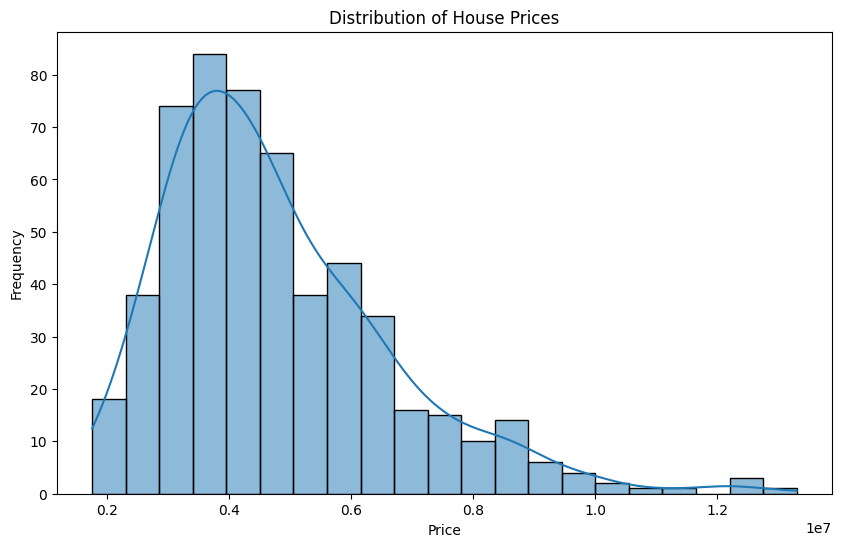

Price statistics:
Min: 1750000
Max: 13300000
Mean: 4766729.25
Median: 4340000.00
Standard deviation: 1870439.62
Skewness: 1.21


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 8: Analyze the target variable
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

print(f"Price statistics:")
print(f"Min: {df['price'].min()}")
print(f"Max: {df['price'].max()}")
print(f"Mean: {df['price'].mean():.2f}")
print(f"Median: {df['price'].median():.2f}")
print(f"Standard deviation: {df['price'].std():.2f}")
print(f"Skewness: {df['price'].skew():.2f}")

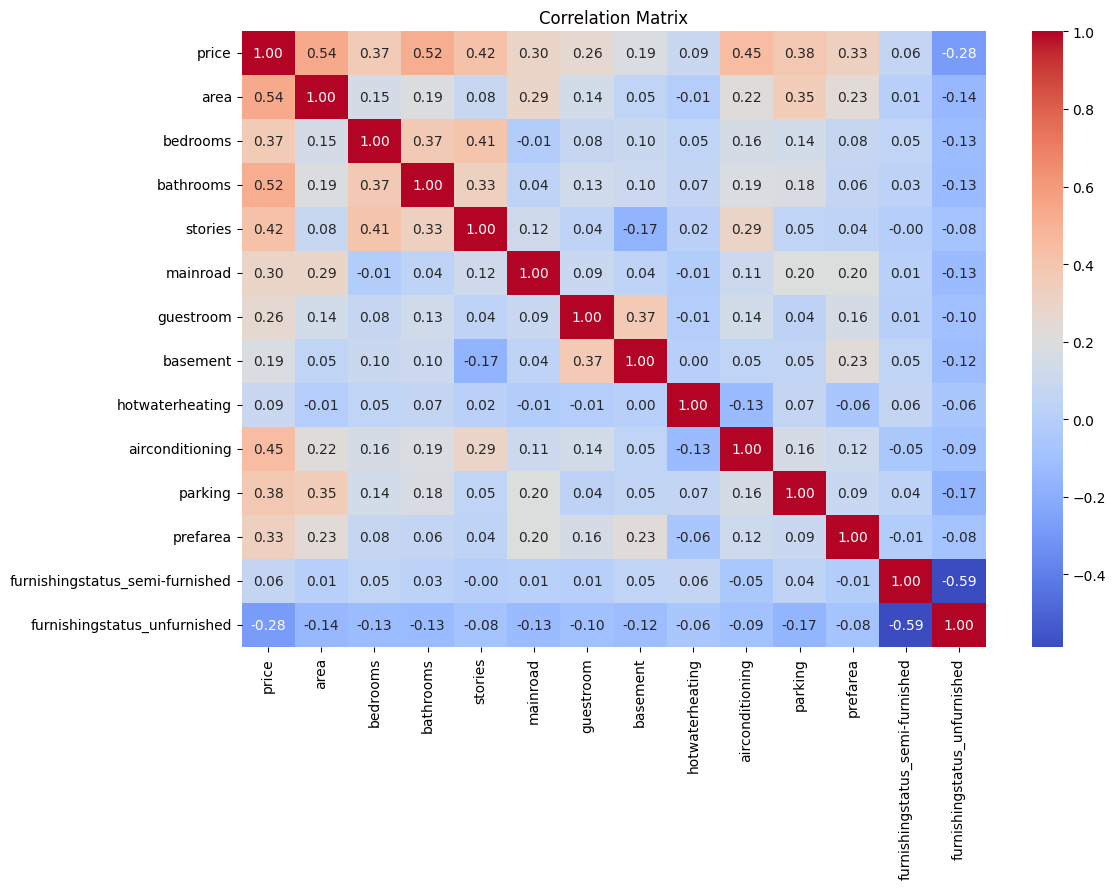

Top correlations with price:
price                              1.000000
area                               0.535997
bathrooms                          0.517545
airconditioning                    0.452954
stories                            0.420712
parking                            0.384394
bedrooms                           0.366494
prefarea                           0.329777
mainroad                           0.296898
guestroom                          0.255517
basement                           0.187057
hotwaterheating                    0.093073
furnishingstatus_semi-furnished    0.063656
furnishingstatus_unfurnished      -0.280587
Name: price, dtype: float64


In [13]:
# Step 9: Correlation analysis

# First convert categorical columns to numeric
df_numeric = df.copy()

# Convert binary categorical columns to numeric
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_cols:
    df_numeric[col] = df_numeric[col].map({'yes': 1, 'no': 0, 'Yes': 1, 'No': 0})

# Handle the 'furnishingstatus' column separately
# Either drop it for correlation analysis or use one-hot encoding
# Option 1: Drop it
# df_numeric = df_numeric.drop('furnishingstatus', axis=1)

# Option 2: One-hot encode (better for correlation analysis)
df_numeric = pd.get_dummies(df_numeric, columns=['furnishingstatus'], drop_first=True)

# Now calculate correlation
correlation = df_numeric.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Step 10: Top correlations with price
price_correlation = correlation['price'].sort_values(ascending=False)
print("Top correlations with price:")
print(price_correlation)

In [14]:
# Step 2: Data Cleaning and Pre-processing
print("="*50)
print("STEP 2: DATA CLEANING AND PRE-PROCESSING")
print("="*50)

STEP 2: DATA CLEANING AND PRE-PROCESSING


In [15]:
# Create a copy of the original dataframe for cleaning
df_cleaned = df.copy()

In [16]:
# 2.1 Check for duplicate records
duplicate_count = df_cleaned.duplicated().sum()
print(f"\nNumber of duplicate records: {duplicate_count}")


Number of duplicate records: 0



Checking for outliers in numerical columns using IQR method:


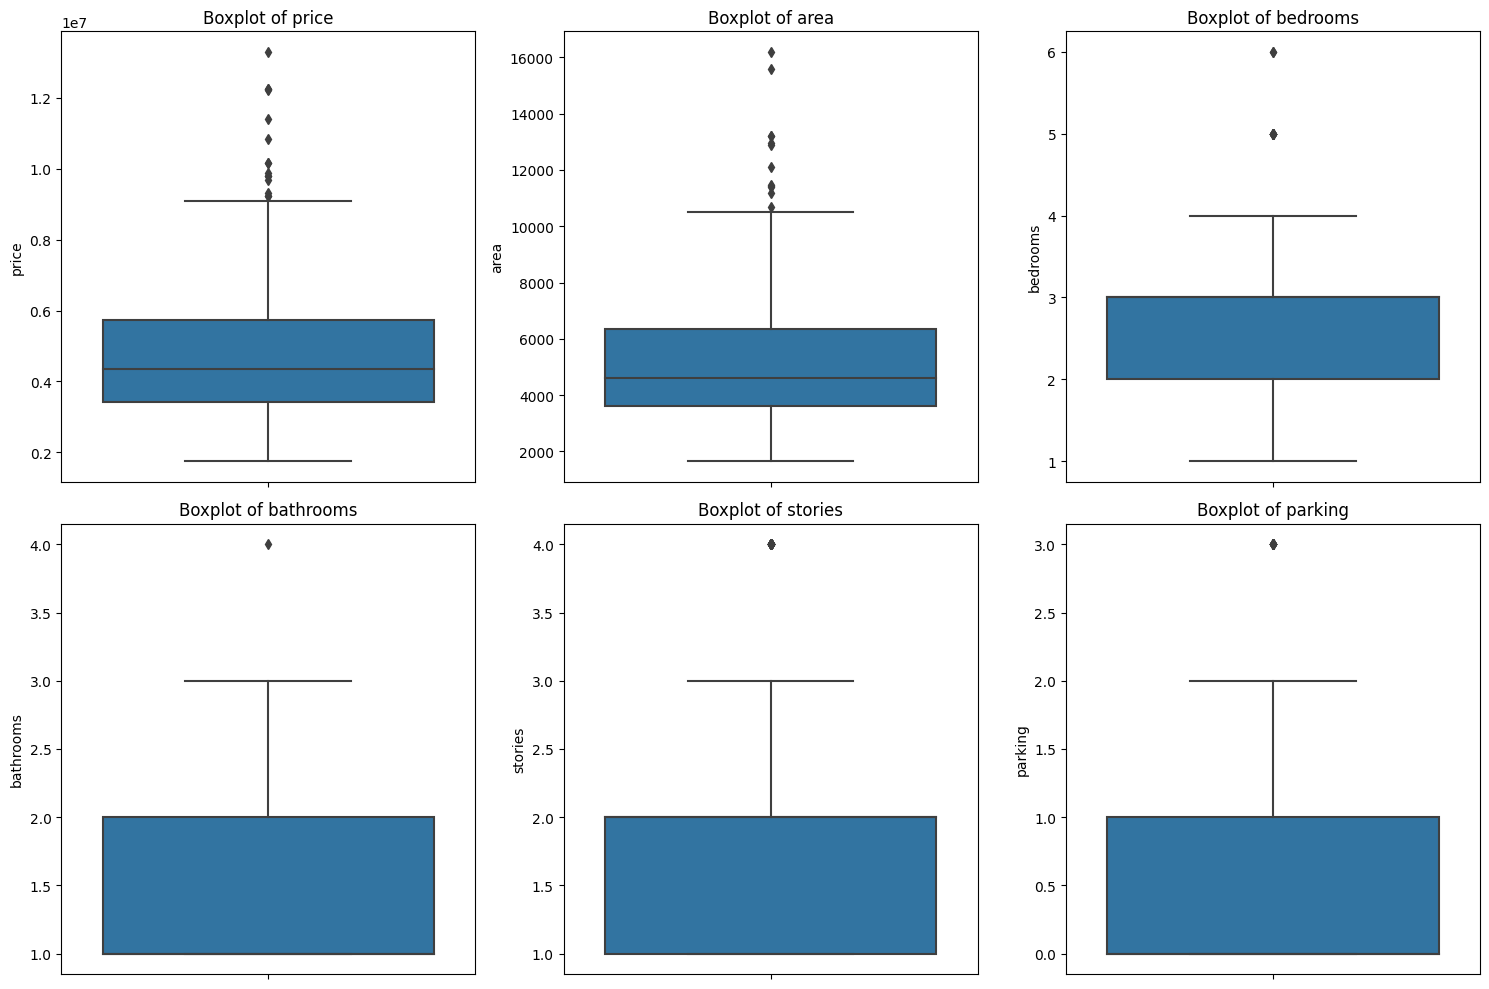

In [17]:
# 2.2 Check for outliers in numerical columns
print("\nChecking for outliers in numerical columns using IQR method:")
numerical_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df_cleaned[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


A balanced approach to outlier detection and handling:


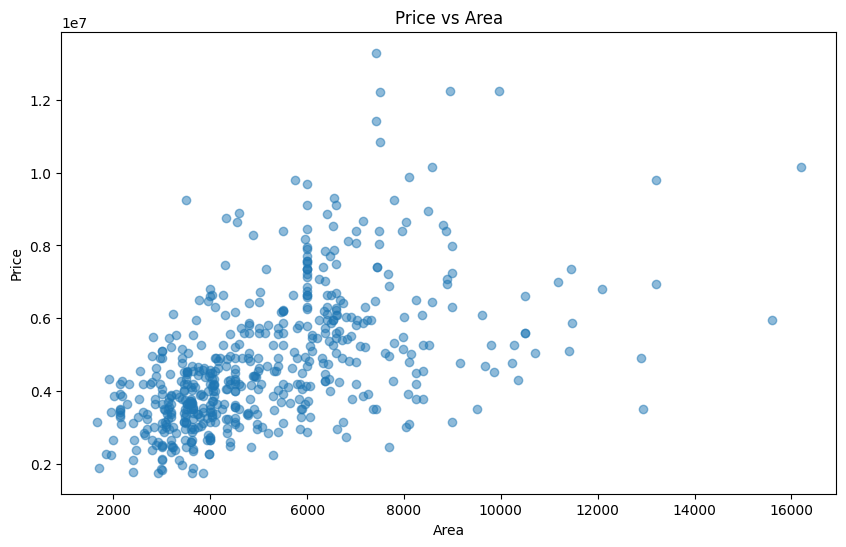


Extreme values (1% and 99% percentiles) for price:
  Lower bound: 1870400.00, Upper bound: 10542000.00
  Number of extreme values: 12
  Extreme values percentage: 2.20%

Extreme values (1% and 99% percentiles) for area:
  Lower bound: 1972.00, Upper bound: 12543.60
  Number of extreme values: 12
  Extreme values percentage: 2.20%

After removing extreme outliers: 521 records (removed 24)


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


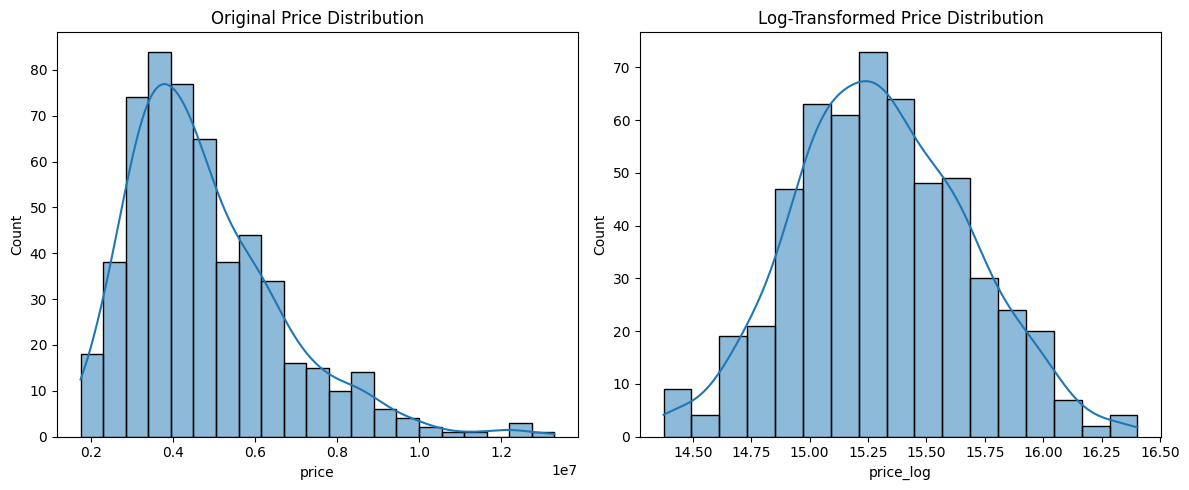


After winsorizing extreme values:
Price - Original range: [1750000, 13300000]
Price - Winsorized range: [1870400.0, 10541999.999999963]
Area - Original range: [1650, 16200]
Area - Winsorized range: [1972.0, 12543.599999999955]

Checking for unreasonable values:
bedrooms: Min=1, Negative values=0, Zero values=0
  Max=6, 99th percentile=5.0, Values above 99th percentile=2
bathrooms: Min=1, Negative values=0, Zero values=0
  Max=4, 99th percentile=3.0, Values above 99th percentile=1
stories: Min=1, Negative values=0, Zero values=0
  Max=4, 99th percentile=4.0, Values above 99th percentile=0
parking: Min=0, Negative values=0, Zero values=299
  Max=3, 99th percentile=3.0, Values above 99th percentile=0


In [18]:
# 2.2 A balanced approach to outlier detection and handling
print("\nA balanced approach to outlier detection and handling:")


# Create scatter plots to see relationship between price and area
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['area'], df_cleaned['price'], alpha=0.5)
plt.title('Price vs Area')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

# 1. Use percentile-based approach for extreme outliers
# This is less rigid than IQR but still identifies extreme values
def detect_extreme_outliers(df, column, lower_percentile=0.01, upper_percentile=0.99):
    lower = df[column].quantile(lower_percentile)
    upper = df[column].quantile(upper_percentile)
    extreme_outliers = df[(df[column] < lower) | (df[column] > upper)]
    return extreme_outliers, lower, upper

# Check for extreme outliers
for col in ['price', 'area']:
    extremes, lower, upper = detect_extreme_outliers(df_cleaned, col)
    print(f"\nExtreme values (1% and 99% percentiles) for {col}:")
    print(f"  Lower bound: {lower:.2f}, Upper bound: {upper:.2f}")
    print(f"  Number of extreme values: {len(extremes)}")
    print(f"  Extreme values percentage: {(len(extremes)/len(df_cleaned)*100):.2f}%")

# 2. Create different versions of the dataset for comparison
# Version 1: Original data
df_original = df_cleaned.copy()

# Version 2: Remove only extreme outliers (1% and 99% percentile)
df_no_extremes = df_cleaned.copy()
for col in ['price', 'area']:
    extremes, lower, upper = detect_extreme_outliers(df_cleaned, col)
    df_no_extremes = df_no_extremes[(df_no_extremes[col] >= lower) & (df_no_extremes[col] <= upper)]

print(f"\nAfter removing extreme outliers: {len(df_no_extremes)} records (removed {len(df_cleaned) - len(df_no_extremes)})")

# Version 3: Log transform the target variable (preserves all data points)
df_log = df_cleaned.copy()
df_log['price_log'] = np.log(df_log['price'])

# Show the effects of log transformation
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_original['price'], kde=True)
plt.title('Original Price Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df_log['price_log'], kde=True)
plt.title('Log-Transformed Price Distribution')
plt.tight_layout()
plt.show()

# Version 4: Winsorize (cap) only the extreme values
df_winsorized = df_cleaned.copy()
for col in ['price', 'area']:
    _, lower, upper = detect_extreme_outliers(df_cleaned, col, 0.01, 0.99)
    df_winsorized[col] = np.clip(df_winsorized[col], lower, upper)

print("\nAfter winsorizing extreme values:")
print(f"Price - Original range: [{df_original['price'].min()}, {df_original['price'].max()}]")
print(f"Price - Winsorized range: [{df_winsorized['price'].min()}, {df_winsorized['price'].max()}]")
print(f"Area - Original range: [{df_original['area'].min()}, {df_original['area'].max()}]")
print(f"Area - Winsorized range: [{df_winsorized['area'].min()}, {df_winsorized['area'].max()}]")

# 3. Check for impossible/unreasonable values (domain reasonability check)
# For example, properties with 0 bedrooms or negative values
print("\nChecking for unreasonable values:")
for col in ['bedrooms', 'bathrooms', 'stories', 'parking']:
    min_val = df_cleaned[col].min()
    unreasonable = df_cleaned[df_cleaned[col] < 0].shape[0]  # Negative values
    zero_values = df_cleaned[df_cleaned[col] == 0].shape[0]  # Zero values
    print(f"{col}: Min={min_val}, Negative values={unreasonable}, Zero values={zero_values}")
    
    # Check for unreasonably high values
    max_val = df_cleaned[col].max()
    high_threshold = df_cleaned[col].quantile(0.99)
    very_high = df_cleaned[df_cleaned[col] > high_threshold].shape[0]
    print(f"  Max={max_val}, 99th percentile={high_threshold}, Values above 99th percentile={very_high}")

# We'll keep all four versions of the dataset for modeling and comparison:
# 1. df_original - Original data
# 2. df_no_extremes - Without extreme outliers
# 3. df_log - With log-transformed price
# 4. df_winsorized - With winsorized extreme values

In [19]:
# 1. Convert binary categorical variables to 1/0
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_cols:
    df_log[col] = df_log[col].map({'yes': 1, 'no': 0, 'Yes': 1, 'No': 0})

print("\nAfter converting binary categorical variables:")
print(df_log[binary_cols].head())


After converting binary categorical variables:
   mainroad  guestroom  basement  hotwaterheating  airconditioning  prefarea
0         1          0         0                0                1         1
1         1          0         0                0                1         0
2         1          0         1                0                0         1
3         1          0         1                0                1         1
4         1          1         1                0                1         0


In [22]:
# 2. Handle furnishing status with one-hot encoding
# Apply one-hot encoding
df_log = pd.get_dummies(df_log, columns=['furnishingstatus'], drop_first=True)

KeyError: "None of [Index(['furnishingstatus'], dtype='object')] are in the [columns]"

In [23]:
# Convert boolean columns to integers (0/1)
boolean_cols = ['furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished']
for col in boolean_cols:
    df_log[col] = df_log[col].astype(int)

In [24]:
df_log.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price_log,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,16.403275,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,16.321036,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,16.321036,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,16.318175,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,16.250001,0,0


In [25]:
# Feature scaling for numerical variables
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Define numerical features to scale
num_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# 1. StandardScaler (Z-score normalization)
scaler_std = StandardScaler()
df_log_std = df_log.copy()
df_log_std[num_features] = scaler_std.fit_transform(df_log[num_features])

# 2. MinMaxScaler (0-1 scaling)
scaler_minmax = MinMaxScaler()
df_log_minmax = df_log.copy()
df_log_minmax[num_features] = scaler_minmax.fit_transform(df_log[num_features])

# 3. RobustScaler (uses median and IQR, good with outliers)
scaler_robust = RobustScaler()
df_log_robust = df_log.copy()
df_log_robust[num_features] = scaler_robust.fit_transform(df_log[num_features])

# Display the first few rows of each scaled dataset
print("After StandardScaler:")
print(df_log_std[num_features].head())

print("\nAfter MinMaxScaler:")
print(df_log_minmax[num_features].head())

print("\nAfter RobustScaler:")
print(df_log_robust[num_features].head())

# Compare the statistical properties of the scaled data
print("\nStandardScaler statistics:")
print(df_log_std[num_features].describe().loc[['mean', 'std']].round(3))

print("\nMinMaxScaler statistics:")
print(df_log_minmax[num_features].describe().loc[['min', 'max']].round(3))

print("\nRobustScaler statistics:")
print(df_log_robust[num_features].describe().round(3))

After StandardScaler:
       area  bedrooms  bathrooms   stories   parking
0  1.046726  1.403419   1.421812  1.378217  1.517692
1  1.757010  1.403419   5.405809  2.532024  2.679409
2  2.218232  0.047278   1.421812  0.224410  1.517692
3  1.083624  1.403419   1.421812  0.224410  2.679409
4  1.046726  1.403419  -0.570187  0.224410  1.517692

After MinMaxScaler:
       area  bedrooms  bathrooms   stories   parking
0  0.396564       0.6   0.333333  0.666667  0.666667
1  0.502405       0.6   1.000000  1.000000  1.000000
2  0.571134       0.4   0.333333  0.333333  0.666667
3  0.402062       0.6   0.333333  0.333333  1.000000
4  0.396564       0.6   0.000000  0.333333  0.666667

After RobustScaler:
       area  bedrooms  bathrooms  stories  parking
0  1.021739       1.0        1.0      1.0      2.0
1  1.579710       1.0        3.0      2.0      3.0
2  1.942029       0.0        1.0      0.0      2.0
3  1.050725       1.0        1.0      0.0      3.0
4  1.021739       1.0        0.0      0.0    

In [26]:
# Let's check for multicollinearity in our housing dataset using the Variance Inflation Factor (VIF). 
# This will help us identify if we have features that are highly correlated with each other.

# Check for multicollinearity using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# We'll check VIF using the StandardScaler version
X = df_log_std.drop(['price', 'price_log'], axis=1)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("Variance Inflation Factors:")
print(vif_data.sort_values("VIF", ascending=False))

Variance Inflation Factors:
                            Feature       VIF
4                          mainroad  3.727078
11  furnishingstatus_semi-furnished  2.031244
6                          basement  1.995314
12     furnishingstatus_unfurnished  1.784739
8                   airconditioning  1.663988
10                         prefarea  1.500173
5                         guestroom  1.473259
3                           stories  1.465830
1                          bedrooms  1.363943
0                              area  1.286408
2                         bathrooms  1.286360
9                           parking  1.206630
7                   hotwaterheating  1.079212


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

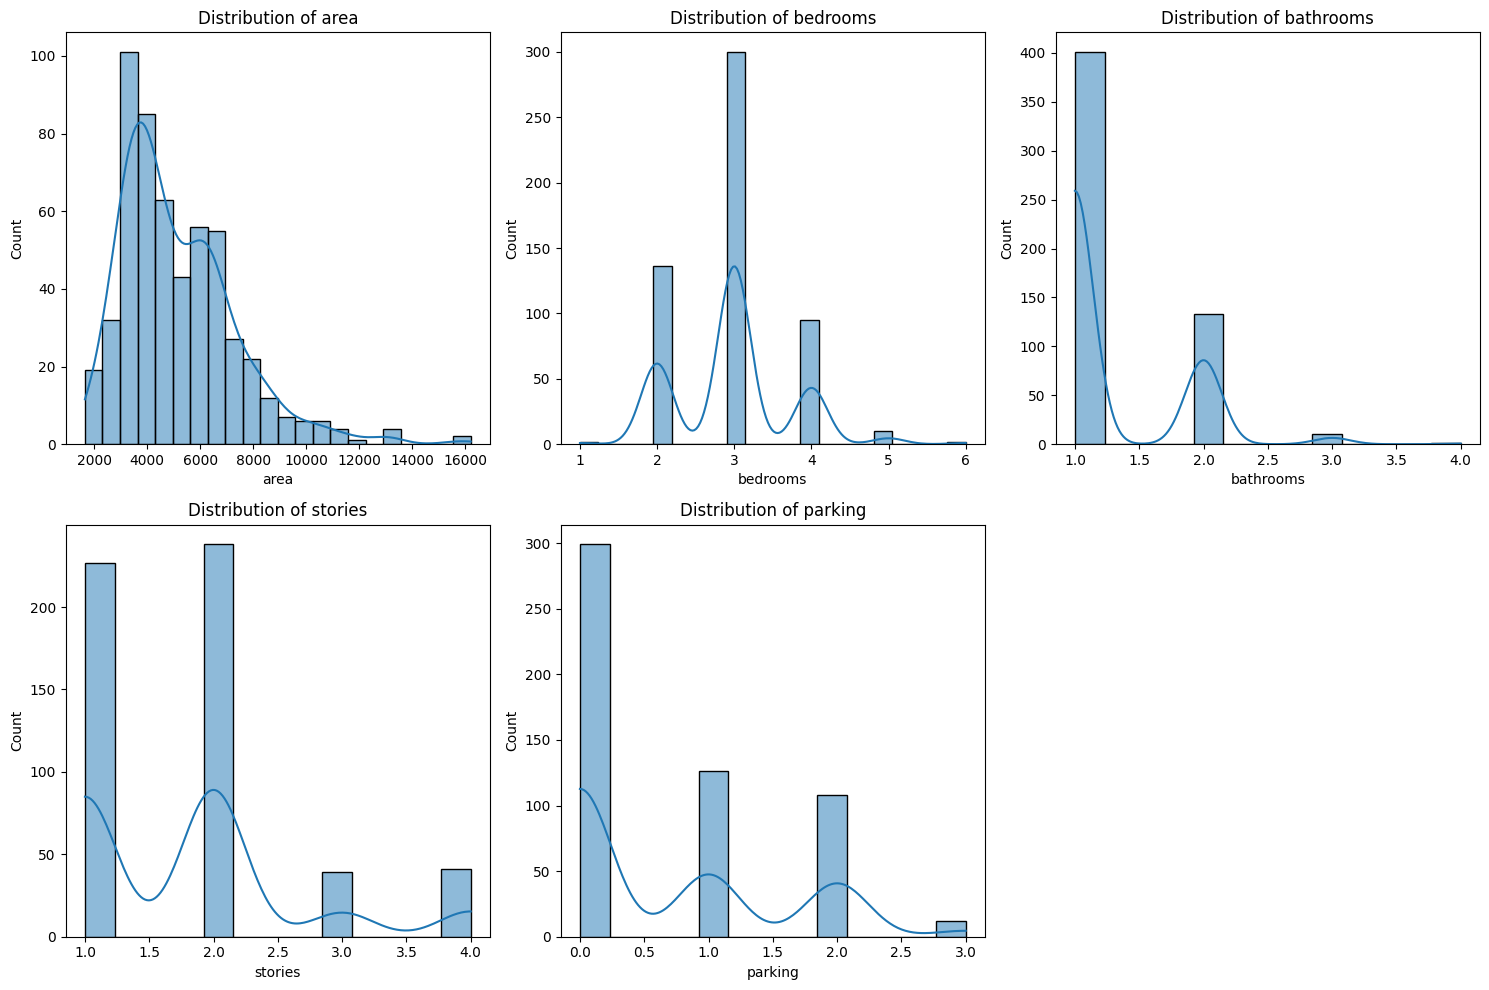

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


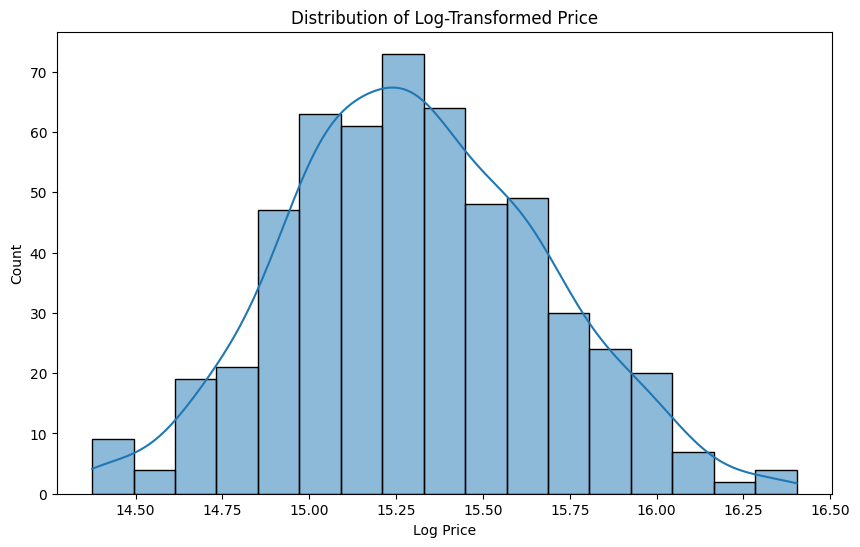

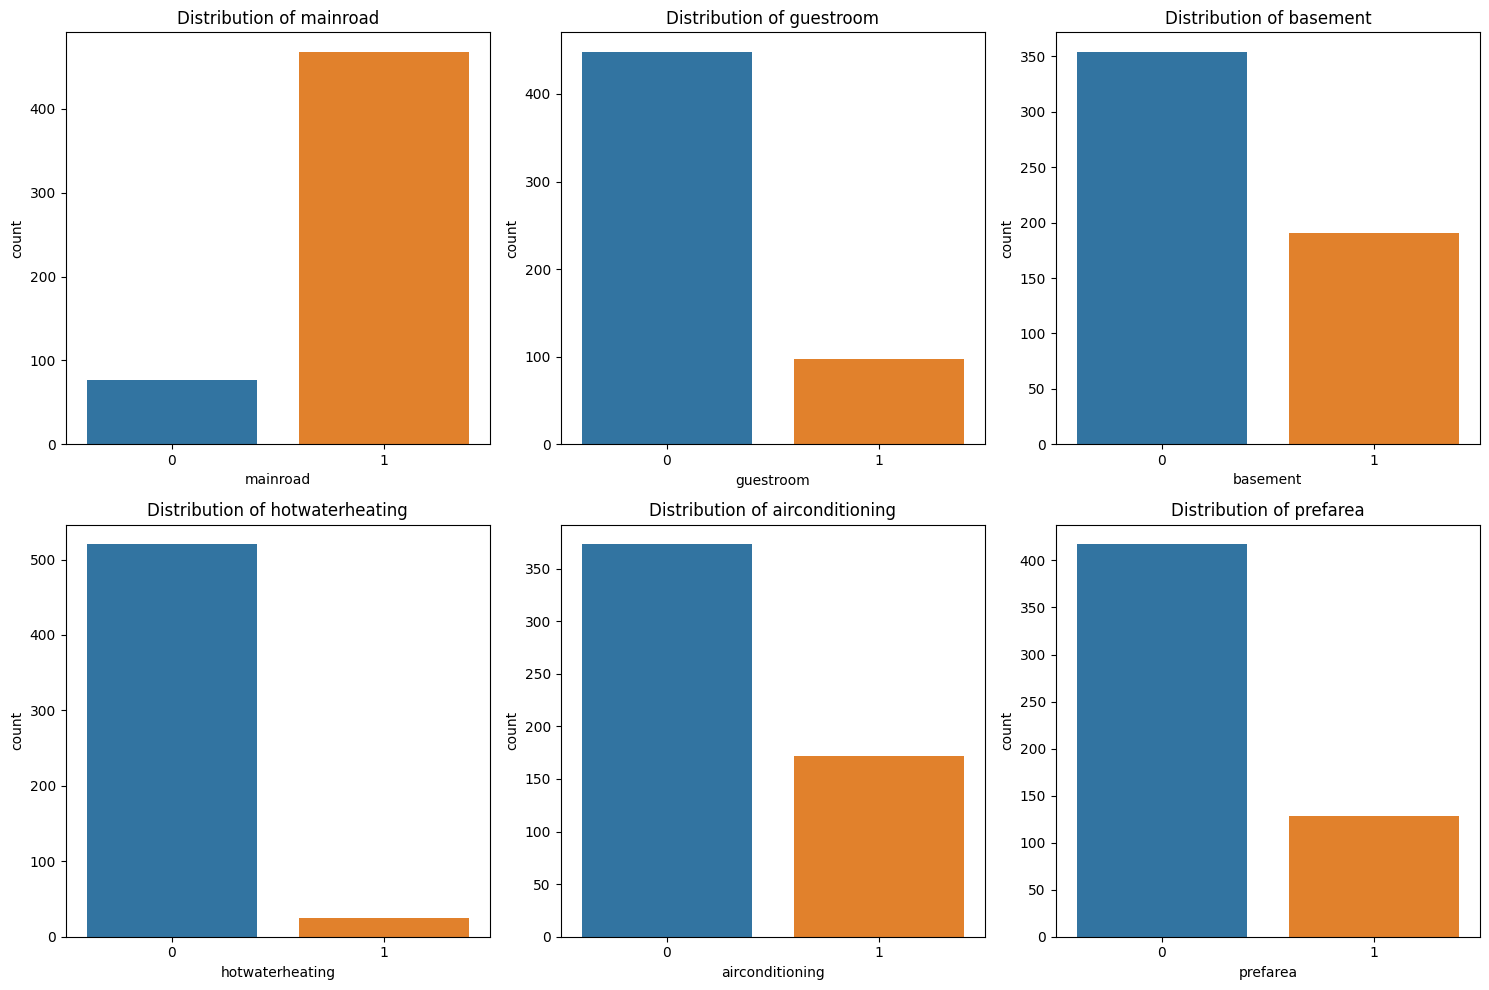

In [27]:
# Examine distribution of numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(['area', 'bedrooms', 'bathrooms', 'stories', 'parking']):
    plt.subplot(2, 3, i+1)
    sns.histplot(df_log[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Verify the effect of log transformation on price
plt.figure(figsize=(10, 6))
sns.histplot(df_log['price_log'], kde=True)
plt.title('Distribution of Log-Transformed Price')
plt.xlabel('Log Price')
plt.show()

# Examine categorical feature distributions
plt.figure(figsize=(15, 10))
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 
                   'airconditioning', 'prefarea']
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=col, data=df_log)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

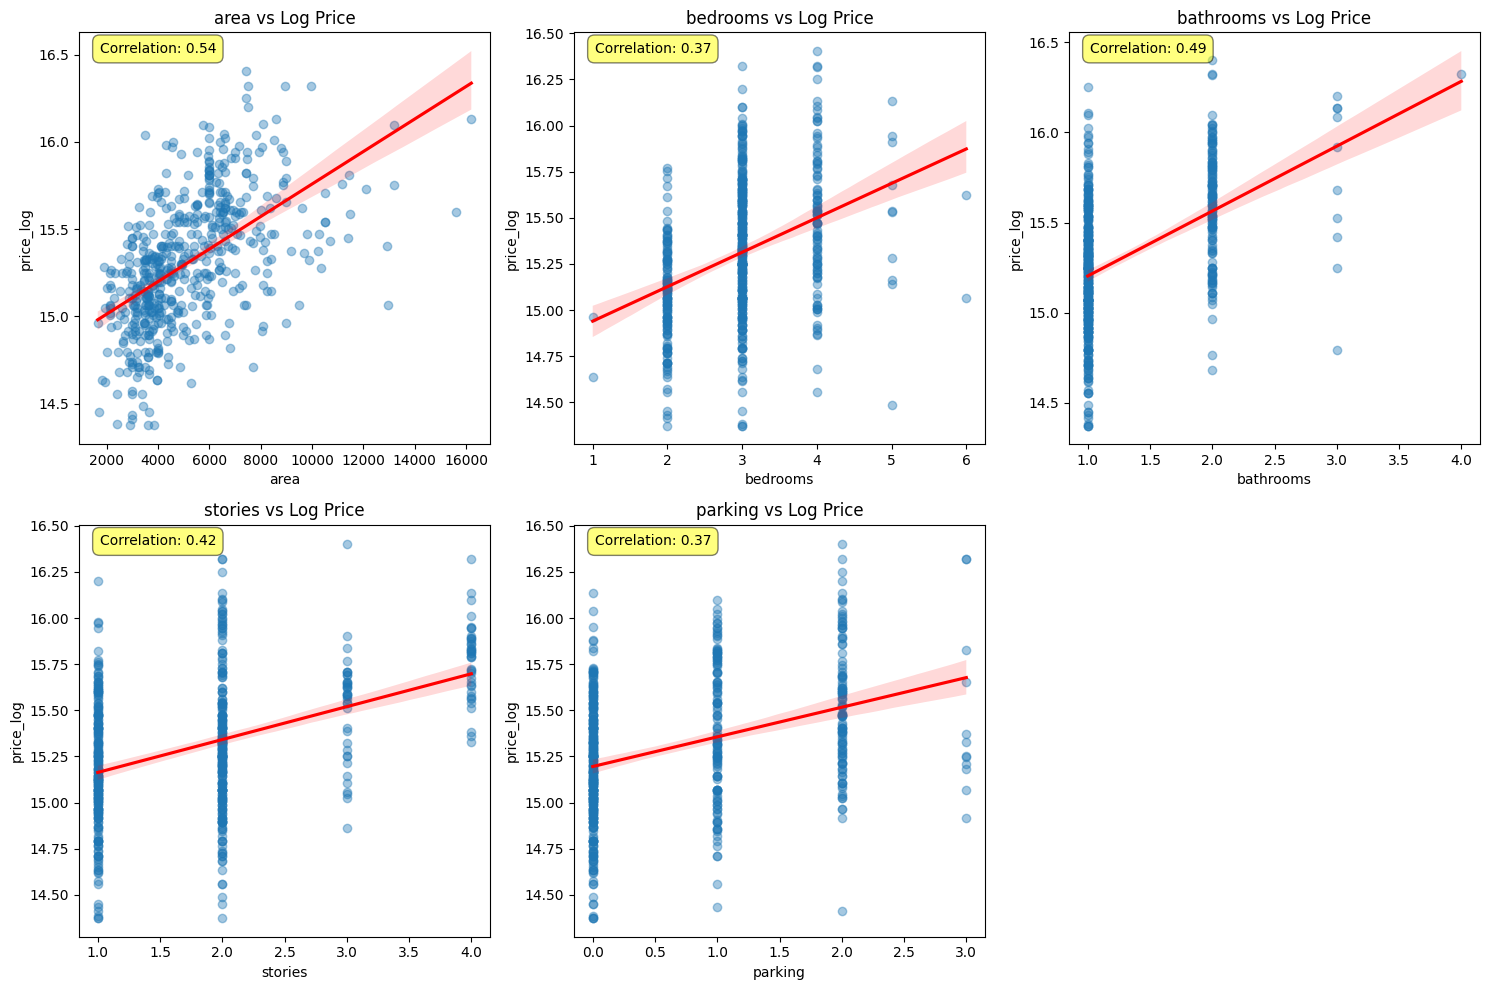

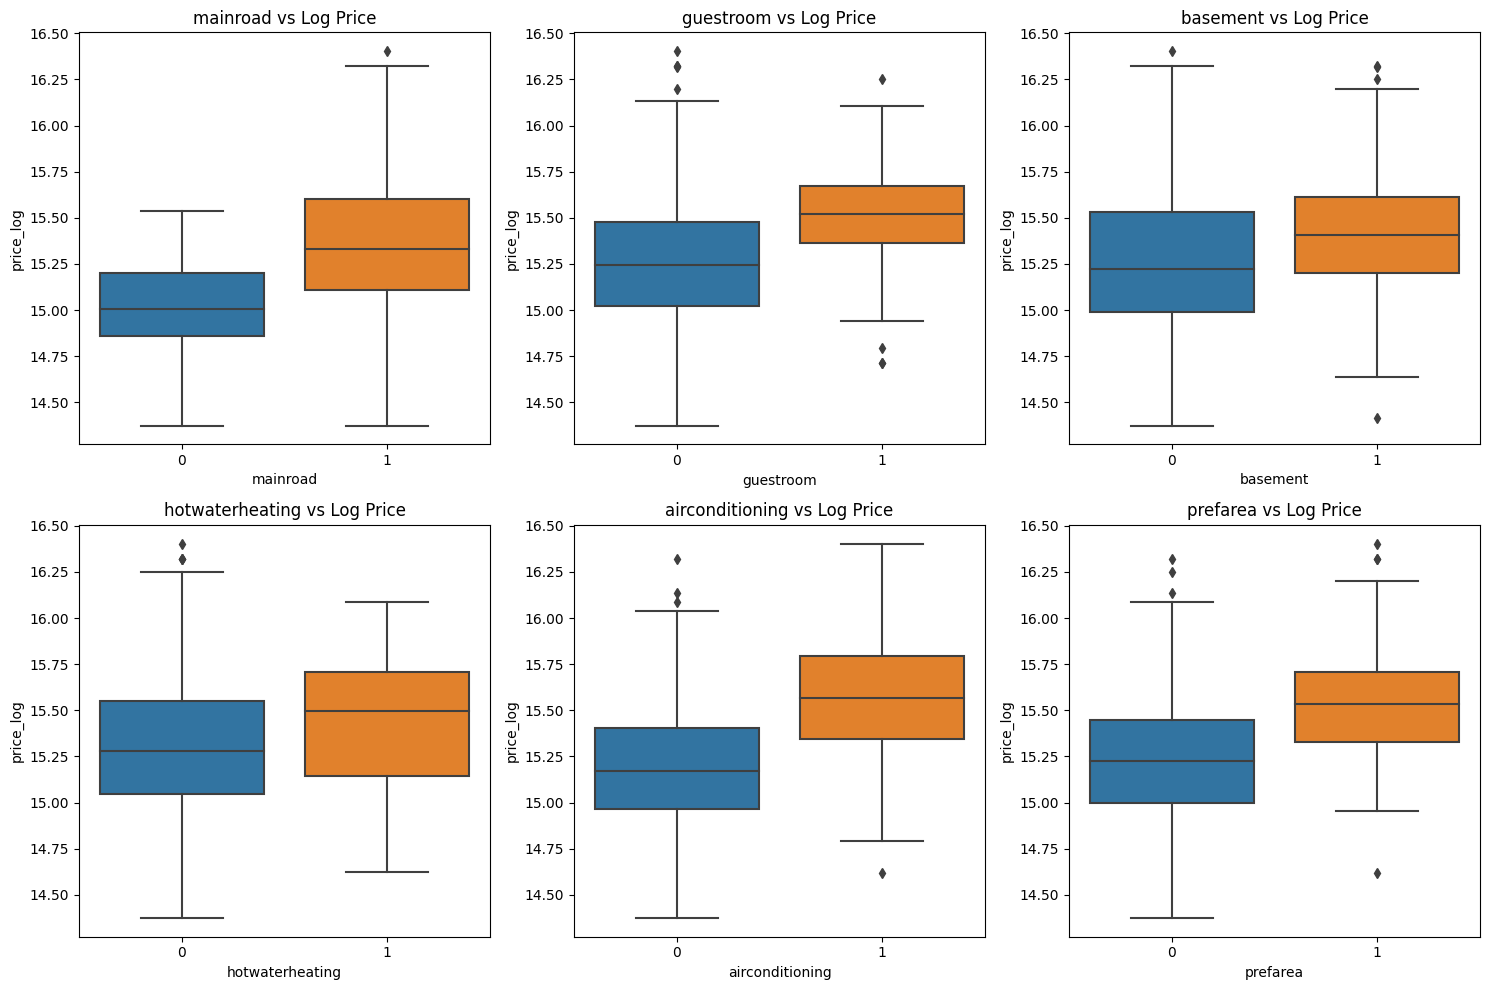

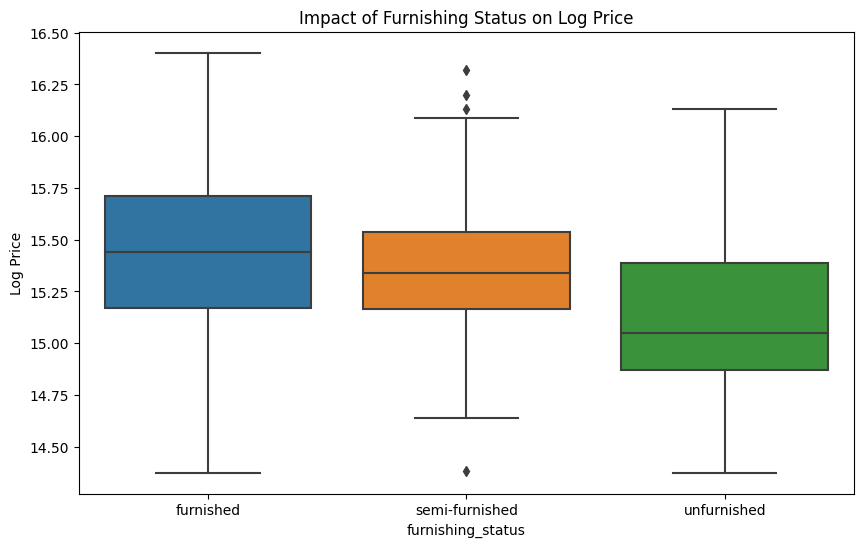

In [28]:
# Relationship between numerical features and log price
plt.figure(figsize=(15, 10))
for i, col in enumerate(['area', 'bedrooms', 'bathrooms', 'stories', 'parking']):
    plt.subplot(2, 3, i+1)
    sns.regplot(x=col, y='price_log', data=df_log, scatter_kws={'alpha':0.4}, line_kws={'color':'red'})
    plt.title(f'{col} vs Log Price')
    # Calculate and display correlation
    corr = df_log[col].corr(df_log['price_log'])
    plt.annotate(f'Correlation: {corr:.2f}', xy=(0.05, 0.95), xycoords='axes fraction',
                bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5))
plt.tight_layout()
plt.show()

# Relationship between categorical features and log price
plt.figure(figsize=(15, 10))
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 
                   'airconditioning', 'prefarea']
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=col, y='price_log', data=df_log)
    plt.title(f'{col} vs Log Price')
plt.tight_layout()
plt.show()

# Furnishing status vs log price
plt.figure(figsize=(10, 6))
furnishing_data = df_log.copy()
furnishing_data['furnishing_status'] = 'furnished'
furnishing_data.loc[df_log['furnishingstatus_semi-furnished'] == 1, 'furnishing_status'] = 'semi-furnished'
furnishing_data.loc[df_log['furnishingstatus_unfurnished'] == 1, 'furnishing_status'] = 'unfurnished'

sns.boxplot(x='furnishing_status', y='price_log', data=furnishing_data)
plt.title('Impact of Furnishing Status on Log Price')
plt.ylabel('Log Price')
plt.show()

In [29]:
df_log_std.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'price_log', 'furnishingstatus_semi-furnished',
       'furnishingstatus_unfurnished'],
      dtype='object')

In [31]:
# You’ll split each of your scaled datasets (df_log_std, df_log_minmax, df_log_robust) for modeling:

from sklearn.model_selection import train_test_split

# Define your target variable
target = 'price_log'

# Example for Standard Scaled Data
X_std = df_log_std.drop(columns=[target])
y_std = df_log_std[target]

X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(X_std, y_std, test_size=0.2, random_state=42)


#Repeat the split similarly for df_log_minmax and df_log_robust.

In [32]:
from sklearn.linear_model import LinearRegression

# Initialize the model
lr_model = LinearRegression()

# Train the model using the training data
lr_model.fit(X_train_std, y_train_std)

LinearRegression()

In [33]:
# Predicting target values using the test set
y_pred_std = lr_model.predict(X_test_std)

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate evaluation metrics
r2 = r2_score(y_test_std, y_pred_std)
mae = mean_absolute_error(y_test_std, y_pred_std)
mse = mean_squared_error(y_test_std, y_pred_std)
rmse = np.sqrt(mse)

# Display the results
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

R² Score: 0.9340
MAE: 0.0775
MSE: 0.0127
RMSE: 0.1129


In [35]:
import pandas as pd

# Extract feature importance
coefficients = pd.DataFrame({
    'Feature': X_train_std.columns,
    'Coefficient': lr_model.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

coefficients

,Feature,Coefficient
5,mainroad,4.577720e-02
13,furnishingstatus_unfurnished,-3.498591e-02
7,basement,2.884003e-02
12,furnishingstatus_semi-furnished,2.394363e-02
9,airconditioning,1.562934e-02
11,prefarea,1.248095e-02
6,guestroom,1.230978e-02
1,area,1.220278e-02
4,stories,8.089446e-03
8,hotwaterheating,6.996957e-03
